<a href="https://colab.research.google.com/github/mirandaliyy/hello-world/blob/main/music_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
runningOnColab = 'google.colab' in sys.modules
if runningOnColab:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  %cd '/content/drive/My Drive/Colab Notebooks/Lark' 
  %ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1dODQ6QwCs1aP4cyBQWf7PsgjjWjNalQk/Lark
 audio.mp3                  jtwya.TextGrid         test1
 hist.json                  jtwya.wav              test2
 history.ipynb              lark                   test.png
 jtwya_processed.TextGrid  'Look at the Sky.mp3'   test.py
 jtwya_processed.wav        src/                   TextGridAnalysis.csv


In [ ]:
pip install flask

In [50]:
import flask

app = flask.Flask(__name__)
app.config["DEBUG"] = True


@app.route('/', methods=['GET'])
def home():
    return "<h1>Distant Reading Archive</h1><p>This site is a prototype API for distant reading of science fiction novels.</p>"

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored

In [ ]:
import librosa

y, sr = librosa.load('audio.mp3')

from struct import unpack
from IPython import display


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
y

array([ 2.7557283e-09, -3.8218384e-09,  5.0231179e-09, ...,
        7.8043687e-01,  8.8200420e-01,  0.0000000e+00], dtype=float32)

In [ ]:
len(y)

93624

In [ ]:
sr

22050

In [ ]:
#pip install python_speech_features

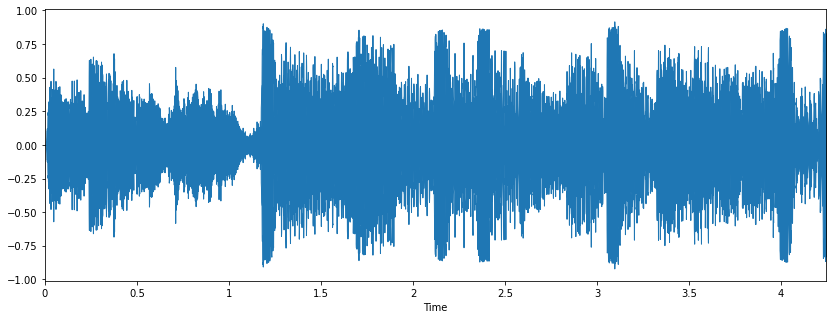

In [ ]:
import numpy as np
!pip install python_speech_features
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)



### Zero-Crossing Rate
The zero-crossing rate is the rate of sign-changes along with a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.
Let us calculate the zero-crossing rate for our example audio clip.

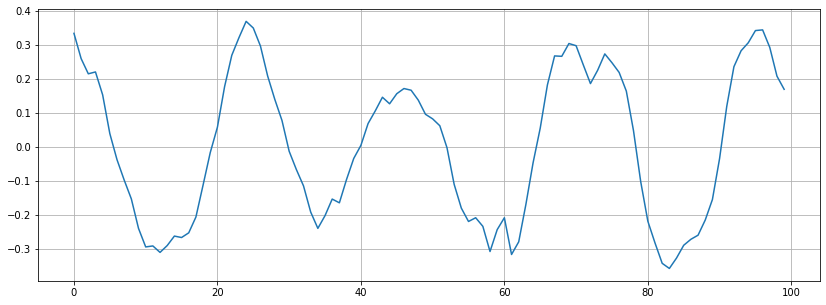

In [ ]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()

In [ ]:
#verify w/ librosa
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

8


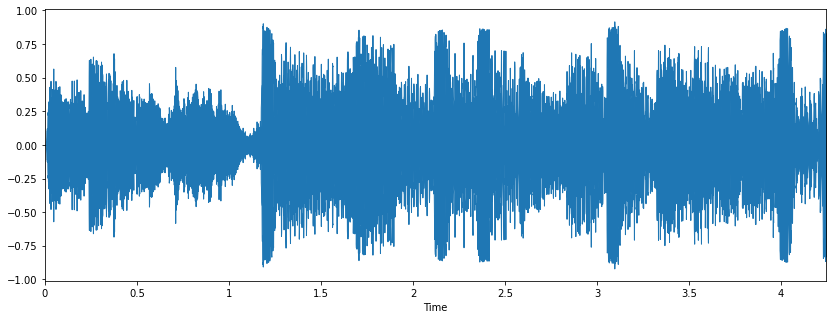

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

### Spectral Centroid
It indicates where the ” center of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. Consider two songs, one from a blues genre and the other belonging to metal. Now, as compared to the blues genre song, which is the same throughout its length, the metal song has more frequencies towards the end. So spectral centroid for blues song will lie somewhere near the middle of its spectrum while that for a metal song would be towards its end.
librosa.feature.spectral_centroid computes the spectral centroid for each frame in a signal:

In [ ]:
import sklearn

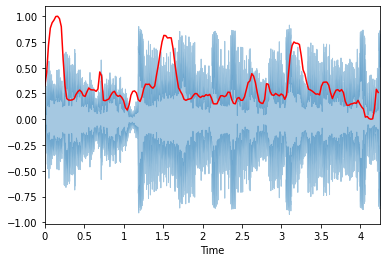

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## **Spectrogram**

Text(0.5, 1.0, 'Frequency over time')

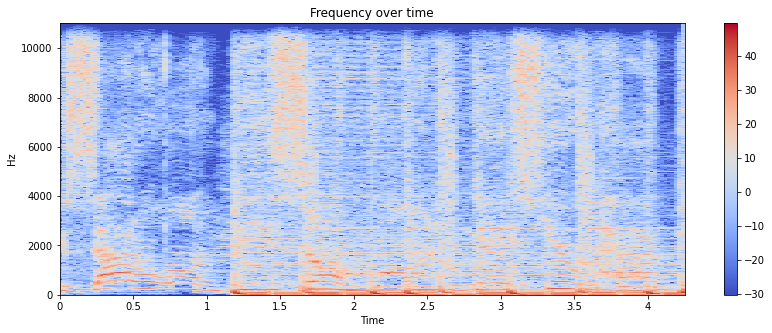

In [ ]:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.ylabel('Hz')
plt.title('Frequency over time')

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.
 
 So here we have the heatmap that shows loudness of the file imported. 

 ### Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal:

from other website:
It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g., 85%, lies.
librosa.feature.spectral_rolloff computes the roll-off frequency for each frame in a signal:

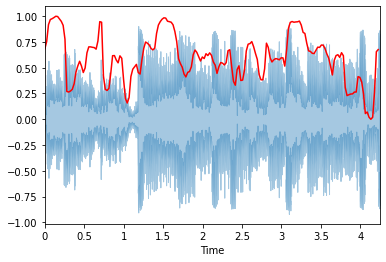

In [ ]:
import sklearn
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### Mel-Frequency Cepstral Coefficients
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) that concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

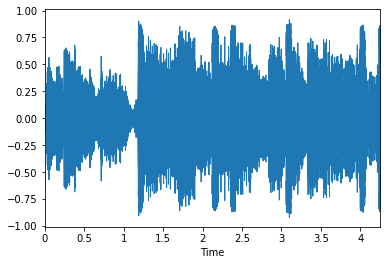

In [ ]:
librosa.display.waveplot(y, sr=sr)

In [ ]:
mfccs = librosa.feature.mfcc(y, sr=sr)
#print( mfccs.shape(20, 97))
#Displaying  the MFCCs:
#librosa.display.specshow(mfccs, sr=sr, x_axis='time')

essentia


In [ ]:
pip install essentia

In [ ]:
import essentia
import essentia.standard as es
from essentia.standard import *
audio= MonoLoader(filename='Look at the Sky.mp3')() 
rhythm_extractor = RhythmExtractor2013(method="multifeature")
bpm, beats, beats_confidence,_, beats_intervals = rhythm_extractor(audio)

In [ ]:
import IPython
IPython.display.Audio('Look at the Sky.mp3')

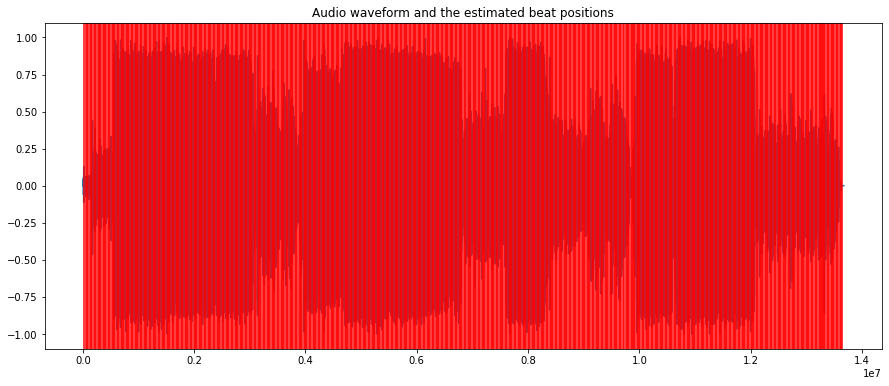

In [ ]:
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 6) # set plot sizes to something larger than default
# beats: the average of all BPM estimates done for each interval between two consecutive beats.
plot(audio)
beat_list=[]
for beat in beats:
    plt.axvline(x=beat*44100, color='red')
    beat_list.append(str(beat))

plt.title("Audio waveform and the estimated beat positions")
json_string1 = json.dumps(beat_list)

In [ ]:
peak1_bpm, peak1_weight, peak1_spread, peak2_bpm, peak2_weight, peak2_spread, histogram = BpmHistogramDescriptors()(beats_intervals)
print("Overall BPM (estimated before): %0.1f" % bpm)
print("First histogram peak: %0.1f bpm" % peak1_bpm)
print("Second histogram peak: %0.1f bpm" % peak2_bpm)

fig, ax = plt.subplots()
ax.bar(range(len(histogram)), histogram, width=1)
ax.set_xlabel('BPM')
ax.set_ylabel('Frequency')
plt.title("BPM histogram")
ax.set_xticks([20 * x + 0.5 for x in range(int(len(histogram) / 20))])
ax.set_xticklabels([str(20 * x) for x in range(int(len(histogram) / 20))])
plt.show()

### Onset detection

In [ ]:
od1 = OnsetDetection(method='hfc')
od2 = OnsetDetection(method='complex')
w = Windowing(type = 'hann')
fft = FFT() # this gives us a complex FFT
c2p = CartesianToPolar() # and this turns it into a pair (magnitude, phase)
pool = essentia.Pool()
# Computing onset detection functions.
for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512):
    mag, phase, = c2p(fft(w(frame)))
    pool.add('features.hfc', od1(mag, phase))
    pool.add('features.complex', od2(mag, phase))
onsets = Onsets()

onsets_hfc = onsets(# this algo expects a matrix, not a vector
                    essentia.array([ pool['features.hfc'] ]),

                    # you need to specify weights, but as there is only a single
                    # function, it doesn't actually matter which weight you give it
                    [ 1 ])

onsets_complex = onsets(essentia.array([ pool['features.complex'] ]), [ 1 ])


# Mark onsets on the audio, which we'll write back to disk
# We use beeps instead of white noise and stereo signal as it's more distinctive

silence = [0.] * len(audio)

beeps_hfc = AudioOnsetsMarker(onsets=onsets_hfc, type='beep')(silence)
AudioWriter(filename='test1', format='mp3')(StereoMuxer()(audio, beeps_hfc))

beeps_complex = AudioOnsetsMarker(onsets=onsets_complex, type='beep')(silence)
AudioWriter(filename='test2', format='mp3')(StereoMuxer()(audio, beeps_complex))

In [ ]:
plot(audio)
for onset in onsets_hfc:
    plt.axvline(x=onset*44100, color='red')

plt.title("Audio waveform and the estimated onset positions (HFC onset detection function)")
plt.show()

plot(audio)
for onset in onsets_complex:
    plt.axvline(x=onset*44100, color='red')

plt.title("Audio waveform and the estimated onset positions (complex onset detection function)")

In [ ]:
onset_list=[]
for onset in onsets_complex:
    onset_list.append(onset)

In [ ]:
print(onset_list)

## Melody detection

In [ ]:
import numpy

# Load audio file; it is recommended to apply equal-loudness filter for PredominantPitchMelodia
loader = EqloudLoader(filename='Look at the Sky.mp3', sampleRate=44100)
audio = loader()
print("Duration of the audio sample [sec]:")
print(len(audio)/44100) #44100.0

# Extract the pitch curve
# PitchMelodia takes the entire audio signal as input (no frame-wise processing is required)

pitch_extractor = PredominantPitchMelodia(frameSize=2048, hopSize=5000)#128
pitch_values, pitch_confidence = pitch_extractor(audio)

# Pitch is estimated on frames. Compute frame time positions
pitch_times = numpy.linspace(0.0,len(audio)/44100,len(pitch_values) )

# Plot the estimated pitch contour and confidence over time
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(pitch_times, pitch_values)
axarr[0].set_title('estimated pitch [Hz]')
axarr[1].plot(pitch_times, pitch_confidence)
axarr[1].set_title('pitch confidence')
plt.show()

In [ ]:
pitch_list=[]
pitch_list=zip(pitch_times,pitch_values)

In [ ]:
#for x in pitch_list:
  #print (x)
  

In [ ]:
from PIL import Image 
import PIL 

# Tonality analysis (HPCP. key, and scale)

In [ ]:
import essentia.streaming as ess

# Initialize algorithms we will use
loader = ess.MonoLoader(filename='Look at the Sky.mp3')
framecutter = ess.FrameCutter(frameSize=4096, hopSize=2048, silentFrames='noise')
windowing = ess.Windowing(type='blackmanharris62')
spectrum = ess.Spectrum()
spectralpeaks = ess.SpectralPeaks(orderBy='magnitude',
                                  magnitudeThreshold=0.00001,
                                  minFrequency=20,
                                  maxFrequency=3500,
                                  maxPeaks=60)
# Use default HPCP parameters for plots, however we will need higher resolution
# and custom parameters for better Key estimation

hpcp = ess.HPCP()
hpcp_key = ess.HPCP(size=36, # we will need higher resolution for Key estimation
                    referenceFrequency=440, # assume tuning frequency is 44100.
                    bandPreset=False,
                    minFrequency=20,
                    maxFrequency=3500,
                    weightType='cosine',
                    nonLinear=False,
                    windowSize=1.)

key = ess.Key(profileType='edma', # Use profile for electronic music
              numHarmonics=4,
              pcpSize=36,
              slope=0.6,
              usePolyphony=True,
              useThreeChords=True)
# Use pool to store data
pool = essentia.Pool()

# Connect streaming algorithms
loader.audio >> framecutter.signal
framecutter.frame >> windowing.frame >> spectrum.frame
spectrum.spectrum >> spectralpeaks.spectrum
spectralpeaks.magnitudes >> hpcp.magnitudes
spectralpeaks.frequencies >> hpcp.frequencies
spectralpeaks.magnitudes >> hpcp_key.magnitudes
spectralpeaks.frequencies >> hpcp_key.frequencies
hpcp_key.hpcp >> key.pcp
hpcp.hpcp >> (pool, 'tonal.hpcp')
key.key >> (pool, 'tonal.key_key')
key.scale >> (pool, 'tonal.key_scale')
key.strength >> (pool, 'tonal.key_strength')

# Run streaming network
essentia.run(loader)

# Plot HPCP
im1=imshow(pool['tonal.hpcp'].T, aspect='auto', origin='lower', interpolation='none')
plt.title("HPCPs in frames (the 0-th HPCP coefficient corresponds to A)")
show()
#plt.imwrite('test.png', im1)
#imwrite(im1,'imageoutput.tif');#
print("Estimated key and scale:", pool['tonal.key_key'] + " " + pool['tonal.key_scale'])

# Fingerprinting